# **E-Commerce customer churn analysis**

### Business Problem Understanding
Churn analysis involves evaluating a company's customer loss rate and developing strategies to reduce it. Churn can significantly impact a business, as an increase in the churn rate leads to challenging times for the company. Replacing lost customers is difficult, and a rising churn rate tends to perpetuate itself over time.

In the context of e-commerce, while businesses aim to maintain a low churn rate, customer churn remains a common issue. This occurs when customers switch to competitors. Here, churn is defined as customers ceasing to buy from the online store. A low churn rate indicates that marketing efforts are targeting the right audience, whereas a high churn rate suggests there are factors driving customers away. Achieving a 0% churn rate is impossible, but the key is to keep the churn rate lower than the business growth rate.

Therefore, churn analysis is essential. Tracking which customers leave and identifying the reasons behind their departure enables companies to take strategic actions to improve business plans and marketing strategies, ultimately boosting revenue.

In this case study, a machine learning model will be developed to predict customer churn in an e-commerce business. This analysis provides several benefits, such as:
- Customer retention: Implementing targeted strategies to retain customers.
- Customer insights: Developing strategies based on understanding customer behavior and preferences, such as personalized marketing.
- Cost management: Retaining loyal customers is typically more cost-effective.
- Improved customer experience: Identifying and addressing factors contributing to complaints.
- Competitor analysis: Gaining insights into competitors’ influence.

### Data Source and Tool Used
The dataset was given and it belongs to an online retail company. The dataset consist of 11 columns and 3941 rows. The rowns indicate the number of customesr and the columns are as follows:
- Tenure: Tenure of a customer in the company (days)
- WarehouseToHome: Distance between customers' house and the warehouse
- NumberOfDeviceRegistered: Number of customers' registered devices (1-6)
- PreferedOrderCat: Customres' preferred order category in the last month (6 categories)
- SatisfactionScore: Customers' satisfaction score (1-5)
- MaritalStatus: Customers' marital status (3 status)
- NumberOfAddress: Number of customers' addresss registered
- Complaint: Complaint raised in the last month (1: complaint, 0: no complaint)
- DaySinceLastOrder: Day since costumers' last order
- CashbackAmount: Last month average cashback
- Churn: Indicate customers' churn (1: churn, 0: not churn)

### Goal
The purpose is to create machine learning model which can predict customers who are likely to churn (leaving the e-commerce)

### Analytic Approach
- Exploratory Data Analysis
  
- Data Cleaning

  Outliers for 'Tenure', 'NumberOfAddress', 'WarehouseToHome', 'DaySinceLastOrder', are erased. Combining 'Mobile' and 'Mobile Phone' under 'PreferedOrderCat' column
  
- Splitting x and y variable

  - x (Dependent variables) = 'Tenure', 'WarehosueToHome', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complaint', 'DaySinceLastOrder', 'CashbaackAmount'

  - y (target variable) = 'Churn'
- Split data to 80:20 for training and testing respectively with random_state=0
- Preprocessing
  
  Preprocessing scheme:
  - Handling missing values with: Iterative Imputer for 'Tenure', 'WarehouseToHome', 'DaySinceLastOrder'
  - One hot encoding
  - Handling imbalance data: SMOTE
  - Scaling: RobustScaler()
    
- Choose the best models with cross validation:
  - Logistic regression 
  - KNN
  - Decision tree
  - Random forest
  - Ada boost 
  - Gradient boost
  - Extreme gradient boost

- Hyperparameter tuning for the best 2 models from cross-validation

  
- Modelling using test set predition
  - Before hyperparameter tuning
  - After hyperparameter tuning
    
### Metric Evaluation
Precision, Recall, F1-score, ROC-AUC curve, precision-recall curve

### Feature Importance
In this part, features contribute to churn is identified. This can be used for the company to maximize their effort in engaging with the customer

# **Import Libraries**

In [4]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Utilities
from sklearn.model_selection import (
    train_test_split, 
    StratifiedKFold, 
    GridSearchCV, 
    RandomizedSearchCV, 
    cross_val_score
)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    recall_score, 
    precision_score, 
    f1_score, 
    classification_report, 
    fbeta_score,
    RocCurveDisplay, 
    roc_auc_score,
    PrecisionRecallDisplay, 
    average_precision_score,
    make_scorer
)

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier, 
    VotingClassifier, 
    StackingClassifier
)
from xgboost import XGBClassifier

# Other Utilities
import warnings
warnings.filterwarnings('ignore')
import pickle
import os

# **Load and Explore Dataset**

In [7]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0          143.32      0  
1                7.0          129.29      0  
2                7.0          168.54      0  
3                NaN          230.27      0  
4                8.0          322.17      0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [11]:
df.shape

(3941, 11)

In [13]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType  null  nullPct  unique  \
0                     Tenure  float64   194     4.92      36   
1            WarehouseToHome  float64   169     4.29      33   
2   NumberOfDeviceRegistered    int64     0     0.00       6   
3           PreferedOrderCat   object     0     0.00       6   
4          SatisfactionScore    int64     0     0.00       5   
5              MaritalStatus   object     0     0.00       3   
6            NumberOfAddress    int64     0     0.00      14   
7                   Complain    int64     0     0.00       2   
8          DaySinceLastOrder  float64   213     5.40      22   
9             CashbackAmount  float64     0     0.00    2335   
10                     Churn    int64     0     0.00       2   

          uniqueSample  
0         [20.0, 60.0]  
1         [36.0, 14.0]  
2               [4, 3]  
3   [Fashion, Grocery]  
4               [3, 5]  
5   [Divorced, Single]  
6              [1, 19]  
7               [1, 0]  
8          [2.0, 31.0]  
9     [139.78, 188.85]  
10              [0, 1]

In [15]:
df.describe()

Tenure  WarehouseToHome  NumberOfDeviceRegistered  \
count  3747.000000      3772.000000               3941.000000   
mean     10.081398        15.650583                  3.679269   
std       8.498864         8.452301                  1.013938   
min       0.000000         5.000000                  1.000000   
25%       2.000000         9.000000                  3.000000   
50%       9.000000        14.000000                  4.000000   
75%      16.000000        21.000000                  4.000000   
max      61.000000       127.000000                  6.000000   

       SatisfactionScore  NumberOfAddress     Complain  DaySinceLastOrder  \
count        3941.000000      3941.000000  3941.000000        3728.000000   
mean            3.088302         4.237757     0.282416           4.531652   
std             1.381832         2.626699     0.450232           3.667648   
min             1.000000         1.000000     0.000000           0.000000   
25%             2.000000         2.000000     0.000000           2.000000   
50%             3.000000         3.000000     0.000000           3.000000   
75%             4.000000         6.000000     1.000000           7.000000   
max             5.000000        22.000000     1.000000          46.000000   

       CashbackAmount        Churn  
count     3941.000000  3941.000000  
mean       176.707419     0.171023  
std         48.791784     0.376576  
min          0.000000     0.000000  
25%        145.700000     0.000000  
50%        163.340000     0.000000  
75%        195.250000     0.000000  
max        324.990000     1.000000

In [17]:
df.describe(include='object')

PreferedOrderCat MaritalStatus
count                 3941          3941
unique                   6             3
top     Laptop & Accessory       Married
freq                  1458          2055

In [19]:
df.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [21]:
df['Churn'].value_counts()

Churn
0    3267
1     674
Name: count, dtype: int64

In [23]:
df['Complain'].value_counts()

Complain
0    2828
1    1113
Name: count, dtype: int64

In [25]:
# Categorical Features
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

['PreferedOrderCat', 'MaritalStatus']

In [27]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

Here, the use of 'Mobile' and 'Mobile Phone' are excessive, thus both will be merged into 'Mobile Phone'

In [30]:
df.loc[df['PreferedOrderCat'].isin(['Mobile', 'Mobile Phone']), 'PreferedOrderCat'] = 'Mobile Phone'

In [32]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: count, dtype: int64

In [34]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount',
 'Churn']

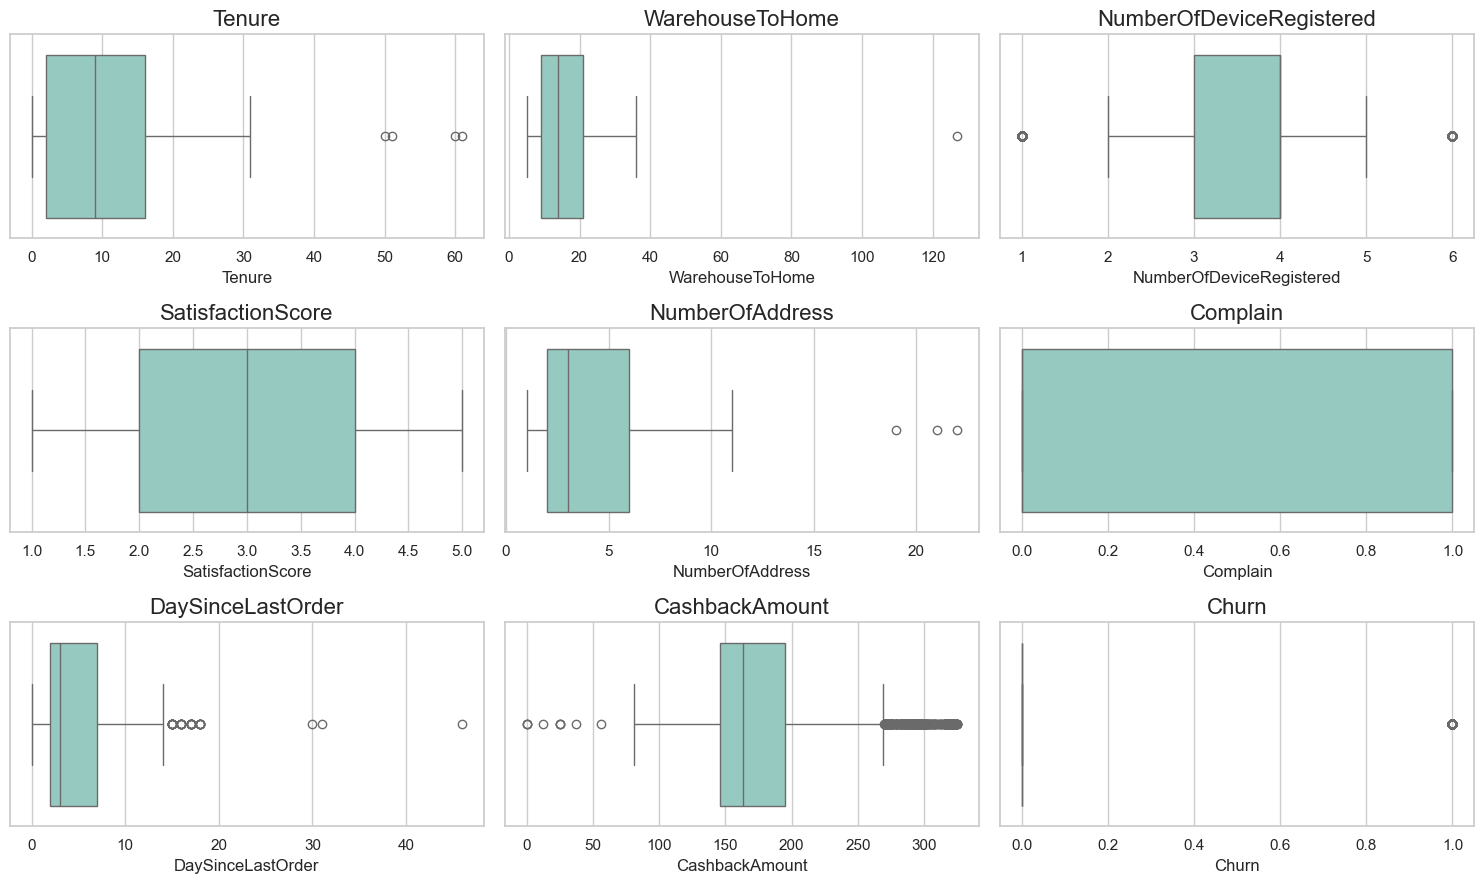

In [36]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1


# **Drop Outliers**

In [38]:
# function to erase outlier 
def outliers(col):

    q3 = col.describe().loc['75%']
    q1 = col.describe().loc['25%']

    iqr = q3-q1

    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    print('Upper fence: ', upper)
    print('Lower fence: ', lower)

In [41]:
for i in list(df.describe()):
    print(i)
    outliers(df[i])
    print()

Tenure
Upper fence:  37.0
Lower fence:  -19.0

WarehouseToHome
Upper fence:  39.0
Lower fence:  -9.0

NumberOfDeviceRegistered
Upper fence:  5.5
Lower fence:  1.5

SatisfactionScore
Upper fence:  7.0
Lower fence:  -1.0

NumberOfAddress
Upper fence:  12.0
Lower fence:  -4.0

Complain
Upper fence:  2.5
Lower fence:  -1.5

DaySinceLastOrder
Upper fence:  14.5
Lower fence:  -5.5

CashbackAmount
Upper fence:  269.57500000000005
Lower fence:  71.37499999999997

Churn
Upper fence:  0.0
Lower fence:  0.0



Only outlier in 4 features will be deleted, 'Tenure', 'WarehouseToHome', 'NumberOfAdress', 'DaySinceLastOrder'. Outliers in cashback amount are not deleted beacuse it can be a meaningful information.

In [44]:
# Erasing outlier for Tenure, WarehouseToHome, NumberOfAddress, DaySinceLastOrder

df = df[(df['Tenure'] <= 37) & (df['Tenure'] >= -19)]
df = df[(df['WarehouseToHome'] <= 39) & (df['WarehouseToHome'] >= -9)]
df = df[(df['NumberOfAddress'] <= 12) & (df['NumberOfAddress'] >= -4)]
df = df[(df['DaySinceLastOrder'] <= 14.5) & (df['DaySinceLastOrder'] >= -5.5)]

In [46]:
df.shape

(3317, 11)

In [48]:
# segment the columns of the DataFrame into two lists based on the number of unique values each column contains.
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)     

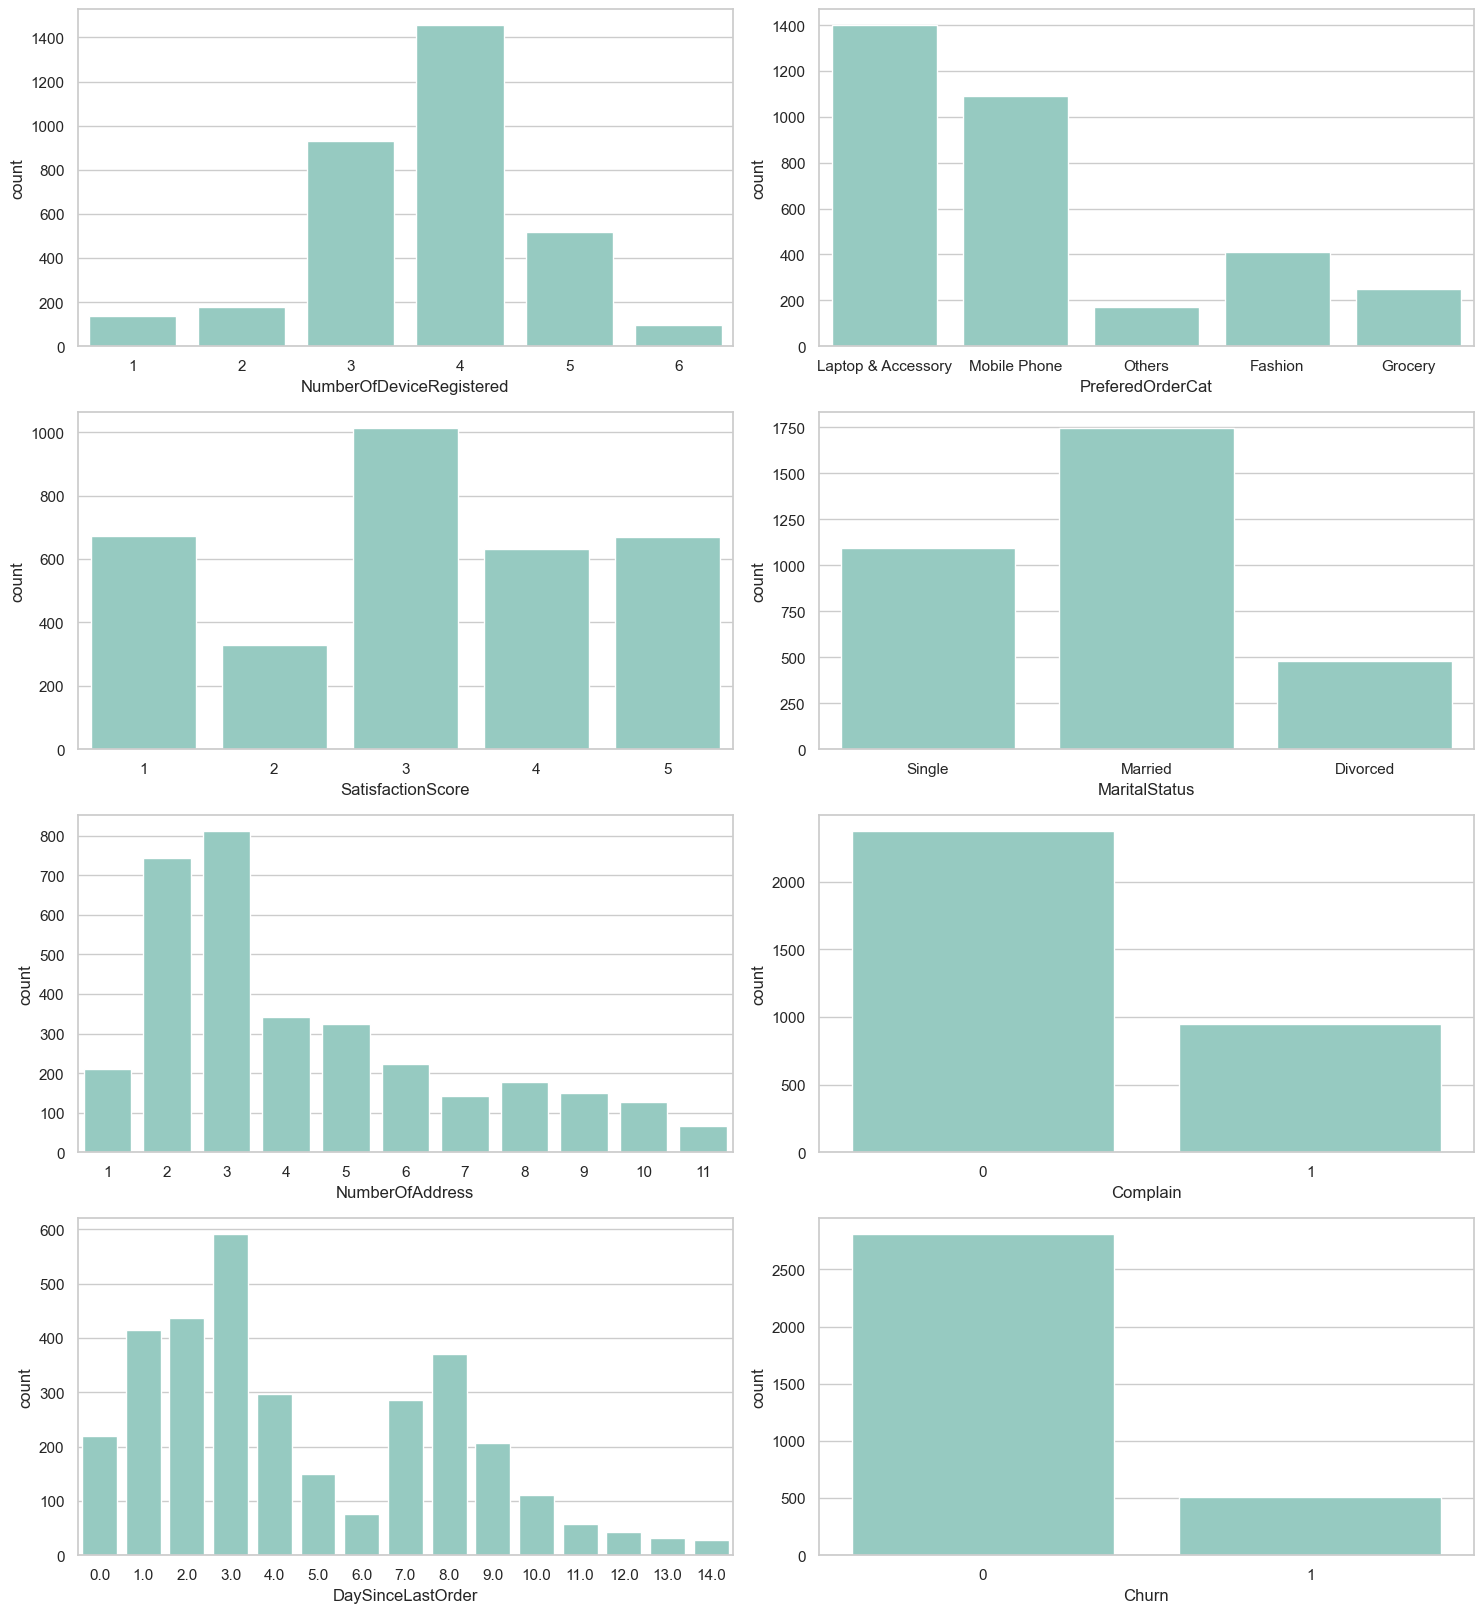

In [50]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col)
    plot_num += 1
    plt.tight_layout()

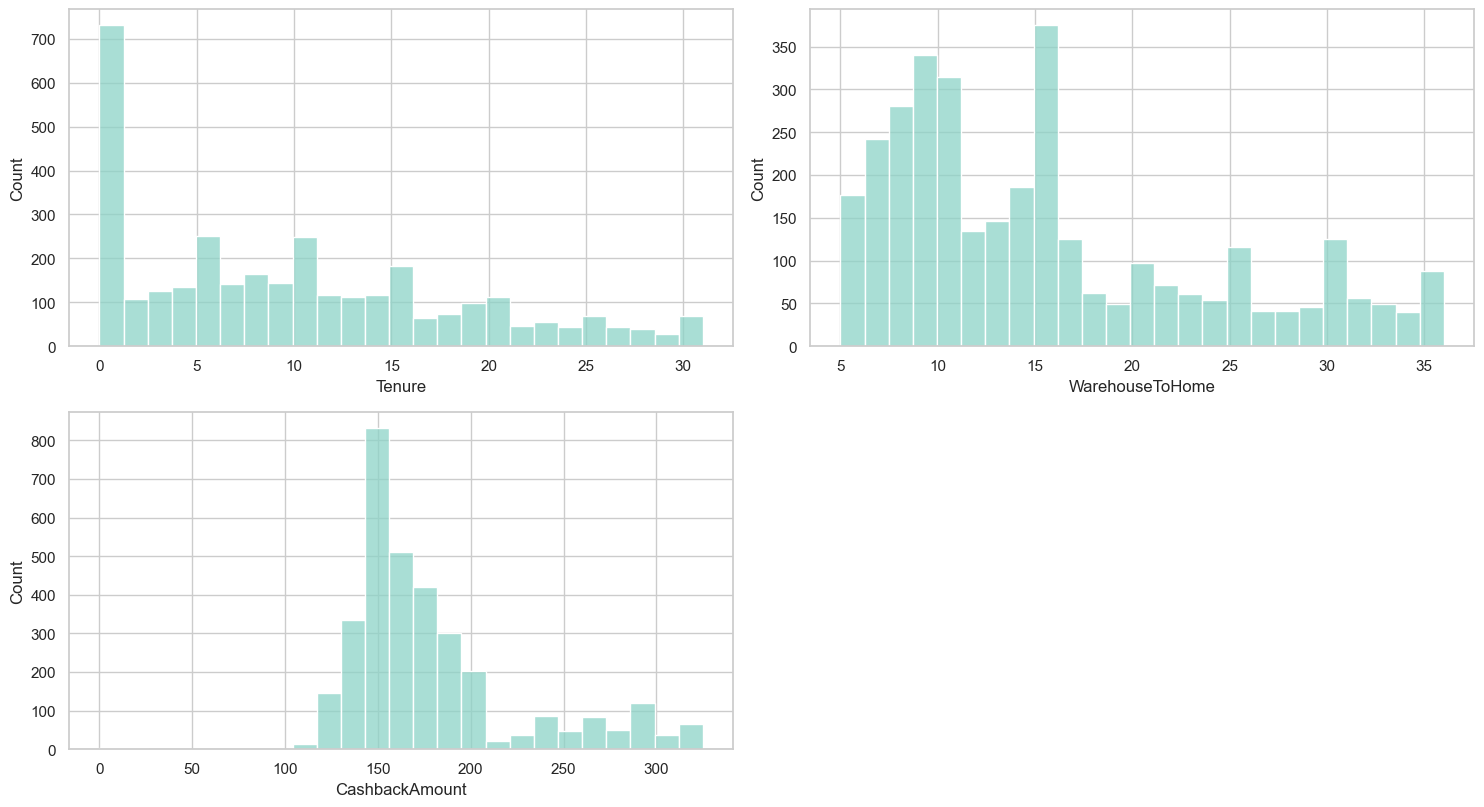

In [51]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

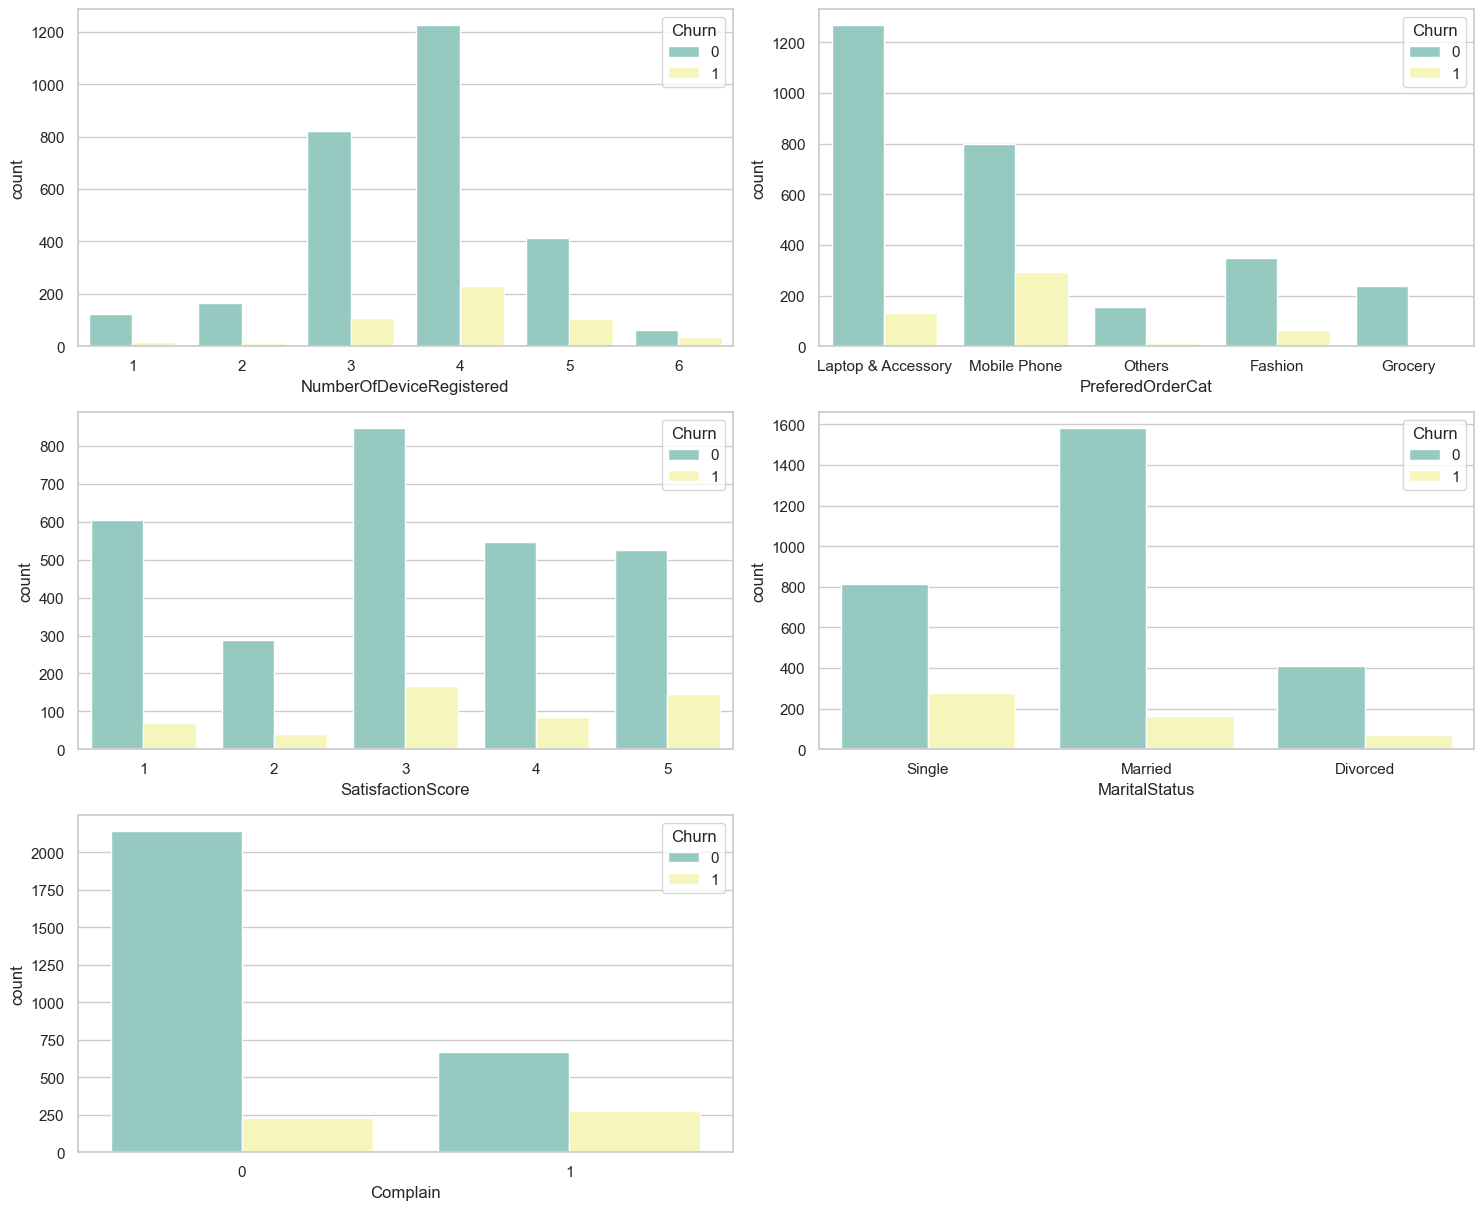

In [52]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "Churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="Churn")
        plot_num += 1
        plt.tight_layout()

# **Define X and Y**

In [54]:
x = df.drop(columns=['Churn'])
y = df['Churn']

# **Data Splitting**

In [58]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    stratify = y,
    test_size = 0.2,
    random_state = 42
)

# **Data Preprocessing**

Imbalance Data
- SMOTE
- RandomUnderSampler
- RandomOverSampler

Handle missing value:
- Iterative Imputer: 'Tenure', 'WarehouseToHome', 'DaysSinceLastOrder'

Encoding:
- One hot encoding: 'PreferedOrderCat', 'MaritalStatus'

Scaling:
- RobustScaler() untuk handle outliers

In [63]:
transformer = ColumnTransformer([
    ('OneHot', OneHotEncoder(), ['PreferedOrderCat', 'MaritalStatus']),
    ('IterativeImputer', IterativeImputer(random_state=0), [ 'Tenure', 'WarehouseToHome', 'DaySinceLastOrder'])
], remainder='passthrough')

In [65]:
# resampling
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

# **Modelling - Cross Validation**
Here we are aiming to find the best model to do prediction. 

We will compare performance of several model using cross-validation which will be the basis in determining the best model based on highest-average F1 score and lowest Standard Deviation. 

In [68]:
#Define the models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors = 5)
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0)

Next is to evaluate the models. In this process, F2 score is used. This parameter put more weight in Recall than Precision because beta=2 which is useful when false negative gives more loss than false positive in the context of churn.

In [71]:
models = [logreg, knn, tree, rf, ada, gbc, xgbc]

all_val = []
mean_val = []
std_val = []

f2_score = make_scorer(fbeta_score, beta=2)

for model in models:
    
    skfold = StratifiedKFold(n_splits=5)
    
    pipe_model = Pipeline([
        ('prep', transformer),
        ('scaler', RobustScaler()),
        ('resampler', smote),
        ('model', model)
    ])
    

    model_cv = cross_val_score(
        pipe_model,
        x_train,
        y_train, 
        cv = skfold,
        scoring = f2_score,
        error_score = 'raise'
    )
    
    all_val.append(model_cv.round(4))
    mean_val.append(model_cv.mean())
    std_val.append(model_cv.std())

    print(model, model_cv)

LogisticRegression(random_state=0) [0.66160521 0.77004219 0.72301426 0.67653277 0.73146293]
KNeighborsClassifier() [0.71428571 0.66737288 0.69915254 0.71428571 0.66945607]
DecisionTreeClassifier(random_state=0) [0.68069307 0.67535545 0.69711538 0.76086957 0.65756824]
RandomForestClassifier(random_state=0) [0.71969697 0.77777778 0.80845771 0.75566751 0.82107843]
AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=0),
                   random_state=0) [0.68796069 0.69248826 0.71764706 0.7748184  0.62034739]
GradientBoostingClassifier(random_state=0) [0.68069307 0.77751196 0.74941452 0.74418605 0.72916667]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_const

In [72]:
pd.DataFrame({
    'model': models,
    'mean': mean_val,
    'std': std_val
})

model      mean       std
0                 LogisticRegression(random_state=0)  0.712531  0.039154
1                             KNeighborsClassifier()  0.692911  0.020761
2             DecisionTreeClassifier(random_state=0)  0.694320  0.035588
3             RandomForestClassifier(random_state=0)  0.776536  0.036526
4  AdaBoostClassifier(estimator=DecisionTreeClass...  0.698652  0.049892
5         GradientBoostingClassifier(random_state=0)  0.736194  0.031861
6  XGBClassifier(base_score=None, booster=None, c...  0.776678  0.035589

Model XGBClassifier dan RandomForest dipilih menjadi 2 model yang paling optimal dengan nilai rata-rata paling tinggi. Selanjutnya, kedua model tersebut akan dilakukan hyperparamter tuning

# **Hyperparameter Tuning**

## **XGB Classifier**

In [76]:
max_depth = list(np.arange(1,10))

learning_rate = list(np.arange(1,100)/100)

n_estimators = list(np.arange(50,500))

subsample = list(np.arange(2,10)/10)

max_features = list(np.arange(1,10))

# Hyperparameter space XGBC / Kumpulan hyperparameter yang akan dicoba dalam tuning
hyperparam_space_xgbc = {
    'balancing':[smote, rus, ros, None],
    'model__max_depth':max_depth ,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

In [77]:
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Benchmark model 1
xgbc = XGBClassifier(random_state=0, verbosity=0)

# Create the algorithm chains / Pipeline yang mencakup transformasi data (mengonversi variabel kategorikal, normalisasi), data balancing, dan model
estimator_xgbc = Pipeline([
    ('transformer', transformer),
    ('scaler', RobustScaler()),
    ('balancing', smote),
    ('model', xgbc)
    ])

# Hyperparameter tuning / RandomizedSearchCV untuk mencoba 30 kombinasi dari hyperparameter di hyperparam_space_gbc.
random_xgbc = RandomizedSearchCV(
    estimator_xgbc,
    param_distributions = hyperparam_space_xgbc,
    cv = skf,
    scoring = f2_score,
    n_jobs = -1,
    random_state=0,
    n_iter=30
)

In [78]:
random_xgbc.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('IterativeImputer',
                                                                               IterativeImputer(random_state=0),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder'])])),
                                             (...
                                                                 0.27, 0.28,
                                                                 0.29, 0.3, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'model__max_features': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [79]:
pd.DataFrame(random_xgbc.cv_results_).sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4        0.368705      0.096582         0.035413        0.004925   
10       2.942007      1.274464         0.168042        0.116696   
0        0.388783      0.025969         0.037755        0.004489   
21       2.454504      0.570299         0.157635        0.129860   
29       3.257127      0.289763         0.036506        0.006887   

    param_model__subsample  param_model__n_estimators  \
4                      0.5                         56   
10                     0.9                        180   
0                      0.6                         83   
21                     0.7                        244   
29                     0.5                        458   

    param_model__max_features  param_model__max_depth  \
4                           3                       8   
10                          7                       8   
0                           3                       7   
21                          6                       9   
29                          1                       4   

    param_model__learning_rate                    param_balancing  \
4                         0.03  RandomOverSampler(random_state=0)   
10                        0.42  RandomOverSampler(random_state=0)   
0                         0.61  RandomOverSampler(random_state=0)   
21                        0.87  RandomOverSampler(random_state=0)   
29                        0.99  RandomOverSampler(random_state=0)   

                                               params  split0_test_score  \
4   {'model__subsample': 0.5, 'model__n_estimators...           0.790094   
10  {'model__subsample': 0.9, 'model__n_estimators...           0.762500   
0   {'model__subsample': 0.6, 'model__n_estimators...           0.783582   
21  {'model__subsample': 0.7, 'model__n_estimators...           0.677749   
29  {'model__subsample': 0.5, 'model__n_estimators...           0.746835   

    split1_test_score  split2_test_score  split3_test_score  \
4            0.783410           0.785219           0.794393   
10           0.769231           0.794045           0.784314   
0            0.748130           0.798526           0.773956   
21           0.777778           0.800493           0.788835   
29           0.760599           0.798526           0.769231   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
4            0.803167         0.791257        0.007086                1  
10           0.841346         0.790287        0.027829                2  
0            0.827338         0.786306        0.026269                3  
21           0.862884         0.781548        0.059692                4  
29           0.807601         0.776558        0.022970                5

In [80]:
print('XGBC')
print('Best_score:', random_xgbc.best_score_)
print('Best_params:', random_xgbc.best_params_)

XGBC
Best_score: 0.7912567643177123
Best_params: {'model__subsample': 0.5, 'model__n_estimators': 56, 'model__max_features': 3, 'model__max_depth': 8, 'model__learning_rate': 0.03, 'balancing': RandomOverSampler(random_state=0)}


## **Random Forest**

In [82]:
max_depth = list(np.arange(1,11))
n_estimators = list(np.arange(100, 201))
max_features = list(np.arange(0.1, 1.0, 0.1))

hyperparam_space_rf = {
    'balancing': [smote, rus, ros, None],
    'model__max_depth': max_depth,
    'model__n_estimators': n_estimators, 
    'model__max_features': max_features
}

In [83]:
rf = RandomForestClassifier(random_state=0)

estimator_rf =  Pipeline([
    ('transformer', transformer), 
    ('scaler', RobustScaler()),
    ('balancing', smote),
    ('model', rf)
])

random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions=hyperparam_space_rf, 
    cv= skf,
    scoring=f2_score,
    n_jobs=-1,
    random_state=0,
    n_iter=30
)

In [84]:
random_rf.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('IterativeImputer',
                                                                               IterativeImputer(random_state=0),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder'])])),
                                             (...
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'model__max_features': [0.1, 0.2,
                                                                0.30000000000000004,
                                                                0.4, 0.5, 0.6,
                                                                0.7000000000000001,
                                                                0.8, 0.9],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [85]:
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
29       6.528357      1.329358         0.134327        0.049309   
8        4.407585      0.692847         0.395550        0.189939   
13       6.379784      1.487305         0.450329        0.226732   
21      11.544850      0.912961         0.114350        0.034068   
23       6.771121      1.251438         0.479019        0.237952   

    param_model__n_estimators  param_model__max_features  \
29                        152                        0.5   
8                         120                        0.8   
13                        154                        0.6   
21                        124                        0.4   
23                        131                        0.2   

    param_model__max_depth                     param_balancing  \
29                       8   RandomOverSampler(random_state=0)   
8                        9  RandomUnderSampler(random_state=0)   
13                       9  RandomUnderSampler(random_state=0)   
21                       9               SMOTE(random_state=0)   
23                       8   RandomOverSampler(random_state=0)   

                                               params  split0_test_score  \
29  {'model__n_estimators': 152, 'model__max_featu...           0.757212   
8   {'model__n_estimators': 120, 'model__max_featu...           0.750552   
13  {'model__n_estimators': 154, 'model__max_featu...           0.741573   
21  {'model__n_estimators': 124, 'model__max_featu...           0.733496   
23  {'model__n_estimators': 131, 'model__max_featu...           0.710843   

    split1_test_score  split2_test_score  split3_test_score  \
29           0.809859           0.782710           0.778302   
8            0.787746           0.779915           0.788913   
13           0.787746           0.778252           0.779915   
21           0.811456           0.781250           0.763723   
23           0.805687           0.813953           0.751790   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
29           0.821596         0.789936        0.023055                1  
8            0.805785         0.782582        0.018101                2  
13           0.819502         0.781397        0.024861                3  
21           0.809859         0.779957        0.029360                4  
23           0.808314         0.778118        0.040435                5

In [86]:
print("Random Forest")
print("Best score:", random_rf.best_score_)
print("Best params:", random_rf.best_params_)

Random Forest
Best score: 0.7899358209377711
Best params: {'model__n_estimators': 152, 'model__max_features': 0.5, 'model__max_depth': 8, 'balancing': RandomOverSampler(random_state=0)}


F2 score in train set:
- benchmark model XGBC: 0.776
- benchmark model random forest: 0.776
- hyperparameter tuning x gradient boost: 0.791
- hyperparameter tuning random forest: 0.789

# **Modelling - Test Set Prediction**

### **Before Hyperparameter Tuning**

In [102]:
models = {
    'XGBC': XGBClassifier(random_state=0, verbosity=0),
    'RandomForest': RandomForestClassifier(random_state=0)
}

score = []
y_predict = []

for i in models:
    model = Pipeline([
        ('transofrmer', transformer), 
        ('balancing', smote),
        ('model', models[i])
    ])

    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    score.append([fbeta_score(y_test, y_pred, beta=2)])
    y_predict.append(y_pred)

score_before_tuning = pd.DataFrame(score, columns=['F2 score'], index=models.keys())
score_before_tuning

F2 score
XGBC          0.757576
RandomForest  0.752033

### **After Hyperparameter Tuning**

In [104]:
xgbc_tuning = random_xgbc.best_estimator_

xgbc_tuning.fit(x_train, y_train)

y_pred_xgbc_tuning = xgbc_tuning.predict(x_test)

In [105]:
f2score_xgbc_tuning = fbeta_score(y_test, y_pred_xgbc_tuning, beta=2)
f2score_xgbc_tuning

0.8130841121495327

In [106]:
rf_tuning = random_rf.best_estimator_

rf_tuning.fit(x_train, y_train)

y_pred_rf_tuning = rf_tuning.predict(x_test)

In [107]:
f2score_rf_tuning = fbeta_score(y_test, y_pred_rf_tuning, beta=2)
f2score_rf_tuning

0.8015267175572519

In [108]:
score_list = [f2score_xgbc_tuning, f2score_rf_tuning]

models = ['XGBC', 'RandomForest']

score_after_tuning = pd.DataFrame({
    'Model': models,
    'F2 score': score_list
})

score_after_tuning

Model  F2 score
0          XGBC  0.813084
1  RandomForest  0.801527

### **Comparison (Test Set)**

In [111]:
score_before_tuning

F2 score
XGBC          0.757576
RandomForest  0.752033

In [112]:
score_after_tuning

Model  F2 score
0          XGBC  0.813084
1  RandomForest  0.801527

In [113]:
print('XGBC')
print(classification_report(y_test, y_pred_xgbc_tuning))

XGBC
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       562
           1       0.69      0.85      0.76       102

    accuracy                           0.92       664
   macro avg       0.83      0.89      0.85       664
weighted avg       0.93      0.92      0.92       664



In [116]:
print('Result from XGBC')
print('Precision:', precision_score(y_test, y_pred_xgbc_tuning))
print('Recall:', recall_score(y_test, y_pred_xgbc_tuning))
print('F1 score', f1_score(y_test, y_pred_xgbc_tuning))

Result from XGBC
Precision: 0.6850393700787402
Recall: 0.8529411764705882
F1 score 0.759825327510917


In [117]:
print('Random Forest')
print(classification_report(y_test, y_pred_rf_tuning))

Random Forest
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       562
           1       0.72      0.82      0.77       102

    accuracy                           0.92       664
   macro avg       0.85      0.88      0.86       664
weighted avg       0.93      0.92      0.93       664



In [118]:
print('Result from Random Forest')
print('Precision:', precision_score(y_test, y_pred_rf_tuning))
print('Recall:', recall_score(y_test, y_pred_rf_tuning))
print('F1 score', f1_score(y_test, y_pred_rf_tuning))

Result from Random Forest
Precision: 0.7241379310344828
Recall: 0.8235294117647058
F1 score 0.7706422018348624


Text(0.5, 1.0, 'XGBC After Tuning')

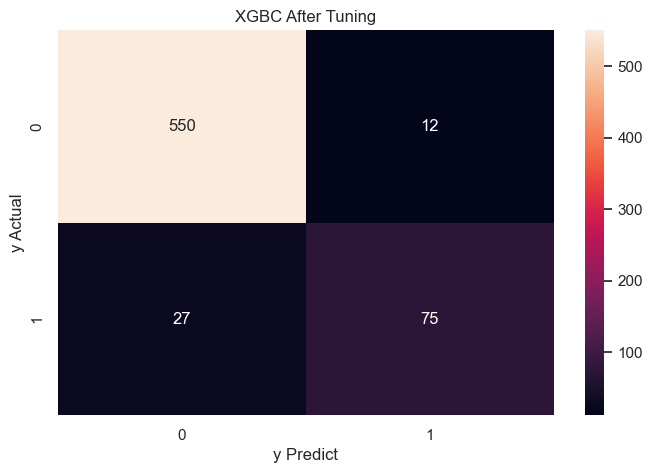

In [119]:
# XGBC after tuning

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predict[0]), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predict')
plt.ylabel('y Actual')
plt.title('XGBC After Tuning')
            

Text(0.5, 1.0, 'RF After Tuning')

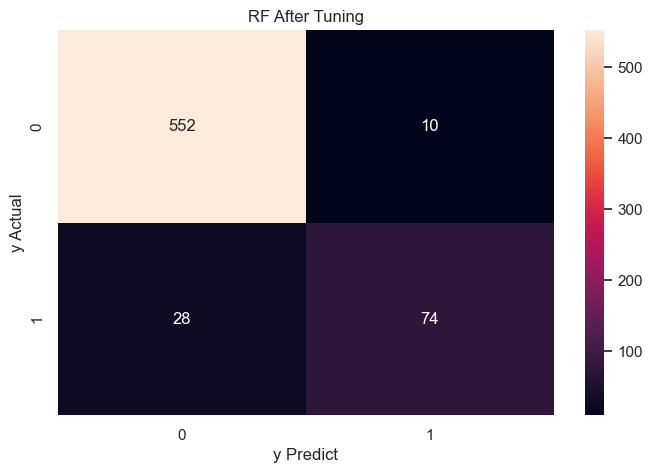

In [120]:
# RG after tuning

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predict[1]), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predict')
plt.ylabel('y Actual')
plt.title('RF After Tuning')
            

# **Metric**  
This section explores various metrics, and from this analysis, the best model will be selected.  

## **Precision**  
Precision measures the model's accuracy in predicting true positives out of all positive predictions. It is particularly useful when the cost of False Positives (FP) is high, as it helps minimize FP.  

In this case study, FP refers to customers predicted to churn by the model but who, in reality, do not churn. In other words, among all the customers classified as churn, how many actually churned?  

Here, two models are compared: XGBoost Classifier (XGBC) and Random Forest (RF).  
- **XGBC:**  
  - Precision: 69%  
  - Out of 87 customers classified as churn, 69% (75 customers) are correctly predicted, while 12 customers are incorrectly predicted as churn.  

- **Random Forest (RF):**  
  - Precision: 72%  
  - Out of 84 customers classified as churn, 74 are correctly predicted, and 10 are incorrectly predicted as churn.  

## **Recall**  
Recall measures the model's ability to correctly predict true positives out of all actual positive observations. It is suitable when the cost of False Negatives (FN) is high, as it helps minimize FN.  

- **XGBC:**  
  - Recall: 85%  
  - Out of 102 customers who actually churned, 85% (75 customers) are correctly predicted, while 27 are mistakenly predicted as not churn.  

- **Random Forest (RF):**  
  - Recall: 82%  
  - Out of 102 customers who actually churned, 74 are correctly predicted, while 28 are mistakenly predicted as not churn.  

## **F1-Score**  
Since there is often a trade-off between precision and recall, the F1-Score provides a balanced metric that combines both. It is particularly useful when both False Positives and False Negatives contribute significantly to the cost.  

- **XGBC:** F1-Score: 76%  
- **RF:** F1-Score: 77%  

The higher the F1-Score, the better the overall performance of the model.  

# **ROC AUC CURVE**  

The ROC AUC curve is used to show a model's ability to classify positive and negative classes (churn or no churn) across various thresholds, which represent the probability limits used by the model to determine the class.  

- **FPR (False Positive Rate):**  
  The FPR is the ratio of False Positives (FP) to the total number of negative samples (TN + FP). It indicates how often the model incorrectly predicts a negative sample as positive, with a value of 0 meaning no mistakes were made.  

- **TPR (True Positive Rate):**  
  The TPR is the ratio of True Positives (TP) to the total number of positive samples (TP + FN). It shows how often the model correctly predicts positive values from all actual positive observations. A value of 1 means the model captures all positive samples correctly.  

The ROC curve approaches the upper-left corner, indicating better performance as the FPR is low and the TPR is high. This means the model is correctly predicting positive values while minimizing mistakes in predicting negative values (no churn).  

For example, if the TPR is 95% and the FPR is 15%, it means the model is correctly predicting 95% of the churned customers, but 15% of non-churn customers are mistakenly predicted as churn.  

- **XGBC Model:** AUC = 0.94  
- **RF Model:** AUC = 0.95  

Both AUC values indicate that the models are good at distinguishing between the positive and negative classes.


## **XGBC**

In [124]:
y_proba_xgbc = xgbc_tuning.predict_proba(x_test)
y_proba_xgbc = y_proba_xgbc[:,1]

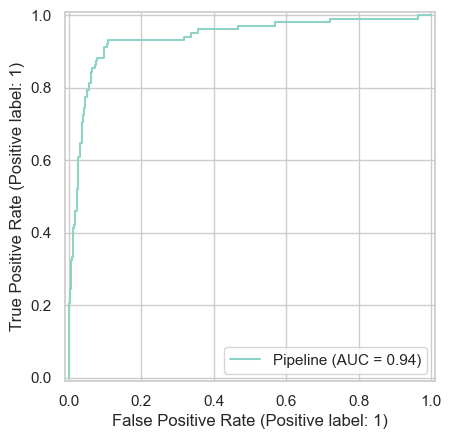

In [125]:
RocCurveDisplay.from_estimator(xgbc_tuning, x_test, y_test)

AUC = 0.95 indicates the model is decent at dividing positive and negative classes

In [130]:
roc_auc_xgbc = roc_auc_score(y_test, y_proba_xgbc)
print(roc_auc_xgbc)

0.9394320005582303


## **RF**

In [136]:
y_proba_rf = rf_tuning.predict_proba(x_test)
y_proba_rf = y_proba_rf[:,1]

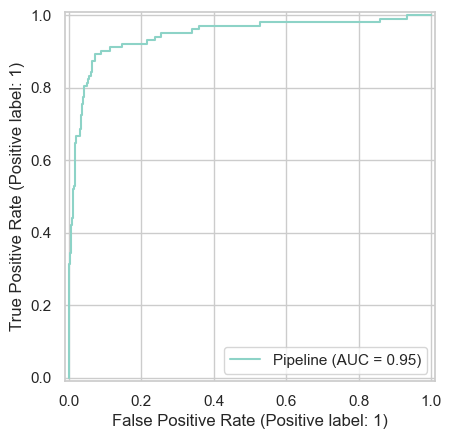

In [139]:
RocCurveDisplay.from_estimator(rf_tuning, x_test, y_test)

In [140]:
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(roc_auc_rf)

0.9454853115623474


# **Precision-Recall Curve**

Precision-Recall curve indicates the success of prediction when the classes are imbalanced. It shows trade-off between precision and recall for a different value of thresholds. The higher the area under the curve shows high both recall and precision. 


## **XGBC**

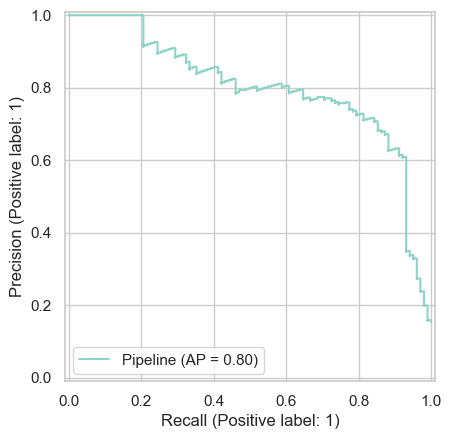

In [144]:
PrecisionRecallDisplay.from_estimator(xgbc_tuning, x_test, y_test)

In [146]:
average_precision = average_precision_score(y_test, y_proba_xgbc)
print("Average Precision Score:", average_precision)

Average Precision Score: 0.8001457441382995


## **RF**

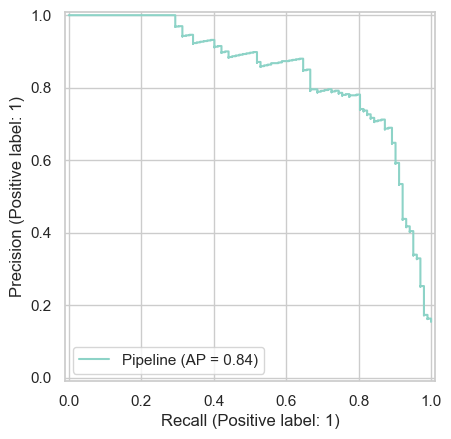

In [149]:
PrecisionRecallDisplay.from_estimator(rf_tuning, x_test, y_test)

In [150]:
average_precision = average_precision_score(y_test, y_proba_rf)
print("Average Precision Score:", average_precision)

Average Precision Score: 0.8417255593658666


Based on the metric above, by comparing the value for each precision, recall, f1-Score, ROC-AUC, and Precision-Recall Curve it is decided that the best model is Ranfom Forest. And from here, only Random Forest model will be used. 

# **Feature Importance**

In [156]:
rf_tuning

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot', OneHotEncoder(),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('IterativeImputer',
                                                  IterativeImputer(random_state=0),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder'])])),
                ('scaler', RobustScaler()),
                ('balancing', RandomOverSampler(random_state=0)),
                ('model',
                 RandomForestClassifier(max_depth=8, max_features=0.5,
                                        n_estimators=152, random_state=0))])

In [157]:
rf_tuning['model'].feature_importances_

array([0.01373337, 0.00161284, 0.01591256, 0.02883465, 0.00226976,
       0.00209487, 0.01211473, 0.03144724, 0.47091911, 0.05962395,
       0.04637812, 0.02349628, 0.04813931, 0.05953441, 0.10750858,
       0.07638022])

In [166]:
cat1= list(transformer.transformers_[0][1].get_feature_names_out())
cat1

['PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [168]:
cat2 = transformer.transformers_[1][2]
cat2

['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

In [170]:
num = list(x_train.columns[transformer.transformers_[2][2]])

In [172]:
feat = cat1 + cat2 + num
feat

['PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Tenure',
 'WarehouseToHome',
 'DaySinceLastOrder',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'CashbackAmount']

In [174]:
feat_imp = pd.DataFrame({
    'feature': feat, 
    'importance': xgbc_tuning['model'].feature_importances_
}).sort_values('importance', ascending=False)

In [176]:
feat_imp

feature  importance
8                                Tenure    0.277501
14                             Complain    0.186290
3         PreferedOrderCat_Mobile Phone    0.069535
7                  MaritalStatus_Single    0.049546
0              PreferedOrderCat_Fashion    0.049098
2   PreferedOrderCat_Laptop & Accessory    0.045737
12                    SatisfactionScore    0.044516
6                 MaritalStatus_Married    0.041345
13                      NumberOfAddress    0.041096
10                    DaySinceLastOrder    0.033828
1              PreferedOrderCat_Grocery    0.031301
4               PreferedOrderCat_Others    0.030595
15                       CashbackAmount    0.028183
11             NumberOfDeviceRegistered    0.027487
9                       WarehouseToHome    0.027408
5                MaritalStatus_Divorced    0.016532

<Axes: xlabel='importance', ylabel='feature'>

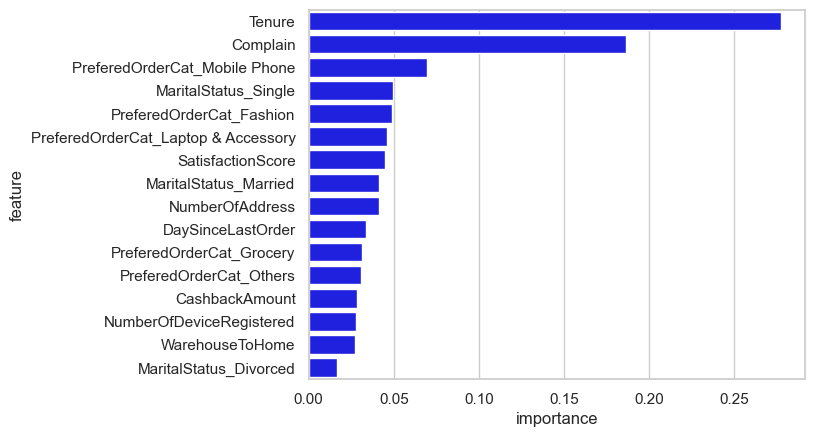

In [178]:
sns.barplot(data=feat_imp, y='feature', x='importance', color='b')

# **Conclusion & Recommendation**

## **Conclusion**
The Random Forest model is selected as the most effective machine learning approach for this case study, demonstrating the highest performance across several evaluation metrics. It is capable of predicting customer churn, providing valuable insights for the e-commerce business.

The model helps companies identify customers at risk of churning and implement actionable measures to retain them. It supports personalized marketing strategies tailored to customer preferences and behavior, enhancing customer satisfaction. Additionally, the model contributes to cost management strategies by prioritizing efforts to retain loyal customers, which is more cost-effective than acquiring new ones.


## **Recommendation**
Once the churn rate is identified, actions can be taken to prevent it. Here are several recommendations to reduce churn:
- Improve customer service: Optimize tools such as live chat, chatbots, and customer support systems.
- Implement loyalty programs: Encourage repeat business through rewards and incentives.
- Offer personalized deals: Create special offers based on customers’ backgrounds or purchasing history, and provide deals for special occasions (e.g., holidays, birthdays).
- Acknowledge customer feedback: Pay attention to customer reviews, especially negative ones, and take action to address concerns.
- Conduct exit surveys: Gather insights from customers who leave to understand their reasons and improve services.

# **Save Model**

In [182]:
with open('Model_RF.sav', 'wb') as file:
    pickle.dump(rf_tuning, file)

In [184]:
filename = 'Model_RF.sav'
pickle.load(open(filename, 'rb'))

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot', OneHotEncoder(),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('IterativeImputer',
                                                  IterativeImputer(random_state=0),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder'])])),
                ('scaler', RobustScaler()),
                ('balancing', RandomOverSampler(random_state=0)),
                ('model',
                 RandomForestClassifier(max_depth=8, max_features=0.5,
                                        n_estimators=152, random_state=0))])